***## Importing the required Libraries ##***

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

***## Fetching Dataset ##***

In [2]:
mnist = fetch_openml('mnist_784', as_frame = False)

In [3]:
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46

In [4]:
x, y  = mnist['data'], mnist['target']

In [5]:
x = np.array(x)

In [6]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
x.shape

(70000, 784)

In [9]:
y.shape

(70000,)

***## Slicing the dataset and plotting the images ##***

In [33]:
some_digit = x[56476]

# reshape the data for plotting 
some_digit_image = some_digit.reshape(28, 28)

(-0.5, 27.5, 27.5, -0.5)

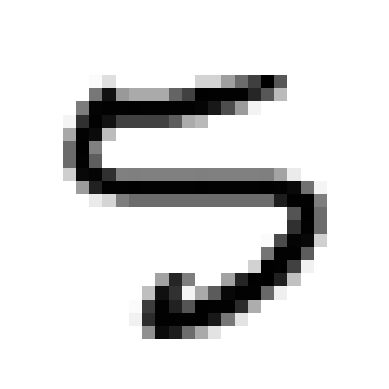

In [34]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')

In [35]:
y[56476]

'5'

In [13]:
x_train, x_test = x[:60000], x[:60000]

In [14]:
y_train, y_test = y[:60000], y[:60000]

***## Shuffling the dataset for moree accurate results ##***


In [15]:
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

***## Creating a 5 Detector ##***

In [16]:
y_train =  y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [17]:
y_train

array([3, 0, 4, ..., 7, 5, 0], dtype=int8)

In [18]:
y_train_2

array([False, False, False, ..., False, False, False])

y_test_2

***## Training the Classifier ##***

In [19]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [20]:
clf = LogisticRegression(max_iter = 1000)

In [21]:
clf.fit(x_train_scaled, y_train_2)

LogisticRegression(max_iter=1000)

***## Making Predictions ##***

In [22]:
clf.predict([some_digit])

array([ True])

***## Performing cross-validation ##***

In [23]:
a =  cross_val_score(clf, x_train_scaled, y_train_2, cv = 3, scoring = 'accuracy' )

In [24]:
a.mean()

0.9773666666666667

***## Visualizing the Accuracy ##***

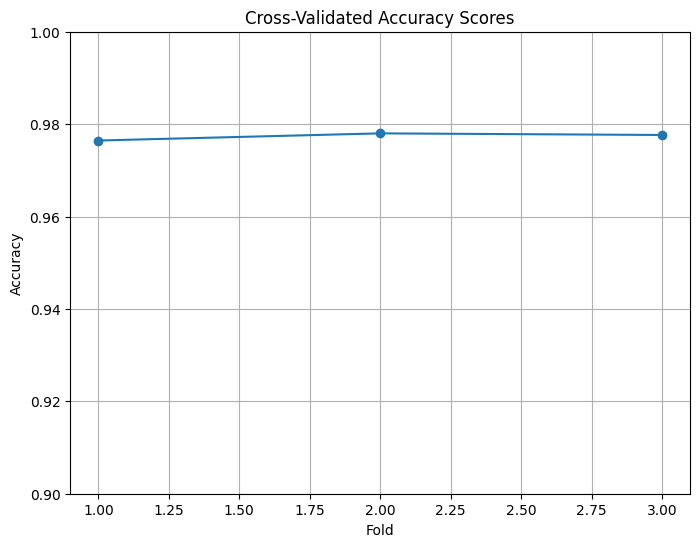

In [25]:
# Plotting the cross-validated accuracy scores below
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(a) + 1), a, marker='o', linestyle='-')
plt.title('Cross-Validated Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1)
plt.grid(True)
plt.show()

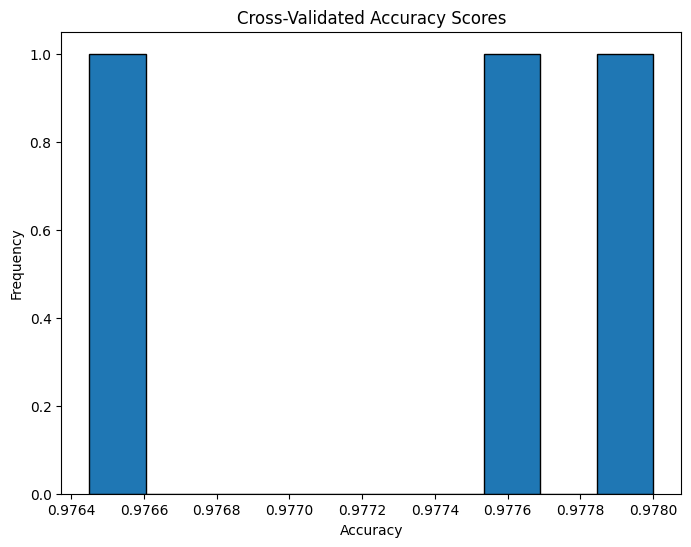

In [26]:
# Plotting Histogram for best visualization
plt.figure(figsize=(8, 6))
plt.hist(a, bins=10, edgecolor='black')
plt.title('Cross-Validated Accuracy Scores')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()
